<a href="https://colab.research.google.com/github/DomingosN/Material_Aprendizado_Maquina_TADS_U-_2020/blob/master/Caso_Pr%C3%A1tico_de_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão um exemplo completo

A regressão é um processo supervisionado de aprendizado de máquina. 
É semelhante à classificação, mas, em vez de **prever um rótulo**, tentamos prever um **valor contínuo**.   
Se você estiver tentando prever um número,**_use a regressão_**.  
Acontece que o sklearn suporta muitos dos mesmos modelos de classificação para problemas de regressão. De fato, a API é a mesma, `.fit()`, `'.score()` e `.predict()`. 
Isso também é válido para as bibliotecas de última geração, XGBoost e LightGBM.  
Embora existam semelhanças com os modelos de classificação e os hiperparâmetros, as métricas de avaliação são diferentes para a regressão.  
Vamos revisar muitos dos tipos de modelos de regressão.  
Usaremos o conjunto de dados da habitação de [Boston](https://www.kaggle.com/prasadperera/the-boston-housing-dataset) para explorá-los.

Primeiro, carregamos os dados, criamos uma versão dividida para treinamento e teste e outra versão dividida com dados padronizados.

## O conjunto de dados da habitação em Boston (_Boston Housing Dataset_)

O Conjunto de Dados de Habitação de Boston é derivado de informações coletadas pelo Serviço de Censo dos EUA sobre residências na área de Boston, MA.  
A seguir, são descritas os atributos ou as colunas do conjunto de dados:

**CRIM** - taxa de criminalidade per capita por cidade  
**ZN** - proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados  
**INDUS** - proporção de acres comerciais não comerciais por cidade.  
**CHAS** - variável fictícia Charles River (1 se o trecho limita o rio; 0 caso contrário)  
**NOX** - concentração de óxidos nítricos (partes por 10 milhões)  
**RM** - número médio de quartos por moradia  
**AGE** - proporção de unidades ocupadas pelos proprietários construídas antes de 1940  
**DIS** - distâncias ponderadas a cinco centros de emprego em Boston  
**RAD** - índice de acessibilidade às rodovias radiais  
**IMPOSTO** - taxa de imposto sobre a propriedade de valor total por US10.000  
**PTRATIO** - proporção aluno-professor por cidade  
**PB** - é a proporção de negros por cidade  
**LSTAT** -perc menor status da população
**MEDV** - Valor médio das casas ocupadas pelos proprietários em US $ 1000

[Uma aplicação prática deste tipo de modelo pode ser verificada aqui](https://www.imovelweb.com.br/precificador/#!/formulario)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
filename = (https://raw.githubusercontent.com/DomingosN/Material_Aprendizado_Maquina_TADS_U-_2020/master/datasets_1815_3139_housing.csv)
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, delim_whitespace=True, names=names)

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Análise dos dados

Vamos começar usando o método `.describe()` onde:
- Count é a contagem dos dados
- Mean é o valor médio de cada atributo
- Std é o desvio padrão de cada atributo
- Min é o valor mínimo de cada atributo
- 25% é o valor dos primeiros 25 % dos valore de cada atributo (1º quartil)
- 50% é o valor dos primeiros 50 % dos valores de cada atributo (2º quartil)
- 75% é o valor dos primeiros 75 % dos valore de cada atributo (3º quartil)
- Max é o valor máximo de cada atributo

In [0]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Histogramas

- Um histograma , também conhecido como distribuição de frequências
- Pode ser apresentados em uma forma gráfica composta por colunas (ou barras).
- As colunas dizem respeito à divisão em faixas (geralmente uniforme) dos valores de uma variável de um conjunto de dados.

Um histograma é um gráfico de frequência que tem como objetivo ilustrar como uma determinada amostra ou população de dados está distribuída. Ele mede quantas vezes temos determinado valor dentro dessa nossa distribuição de dados.

Os dados de um indicador de interesse para a qualidade podem ser divididos em:

**Classificação (qualitativos)**: os resultados possíveis serão apenas afirmações ou negações, como peça defeituosa ou não defeituosa, entrega atrasada ou não atrasada, cliente satisfeito ou insatisfeito);  
**Contagem**: os resultados são números inteiros. por exemplo, número de riscos em uma peça, número de acidentes no mês;  
**Contínuos:** os resultados podem ser quaisquer números dentro de um intervalo, ou seja, peso, comprimento, gasto mensal, etc.  
Depois de coletá-los, a primeira atividade visa ao entendimento, uma vez que nosso cérebro não é preparado para compreender um extenso conjunto de dados. É aqui que entra o histograma, pois permitirá a obtenção das seguintes informações sobre o nosso processo:  
**Centralidade**: qual é o centro de distribuição? Onde é esperado que esteja a maioria das observações?
**Amplitude**: a distribuição normalmente contém observações entre quais valores? Qual é o ponto de máximo e o ponto de mínimo?  
**Simetria**: será que devemos esperar a mesma frequência de pontos com valor alto e com valor baixo? Será que o processo é simétrico ou valores mais altos são mais raros?  

![Histograma](https://d1lc5plzz0mq74.cloudfront.net/wp-content/uploads/2015/08/21202945/ED_1.png)

### Vamos fazer um histograma de todas a variáveis

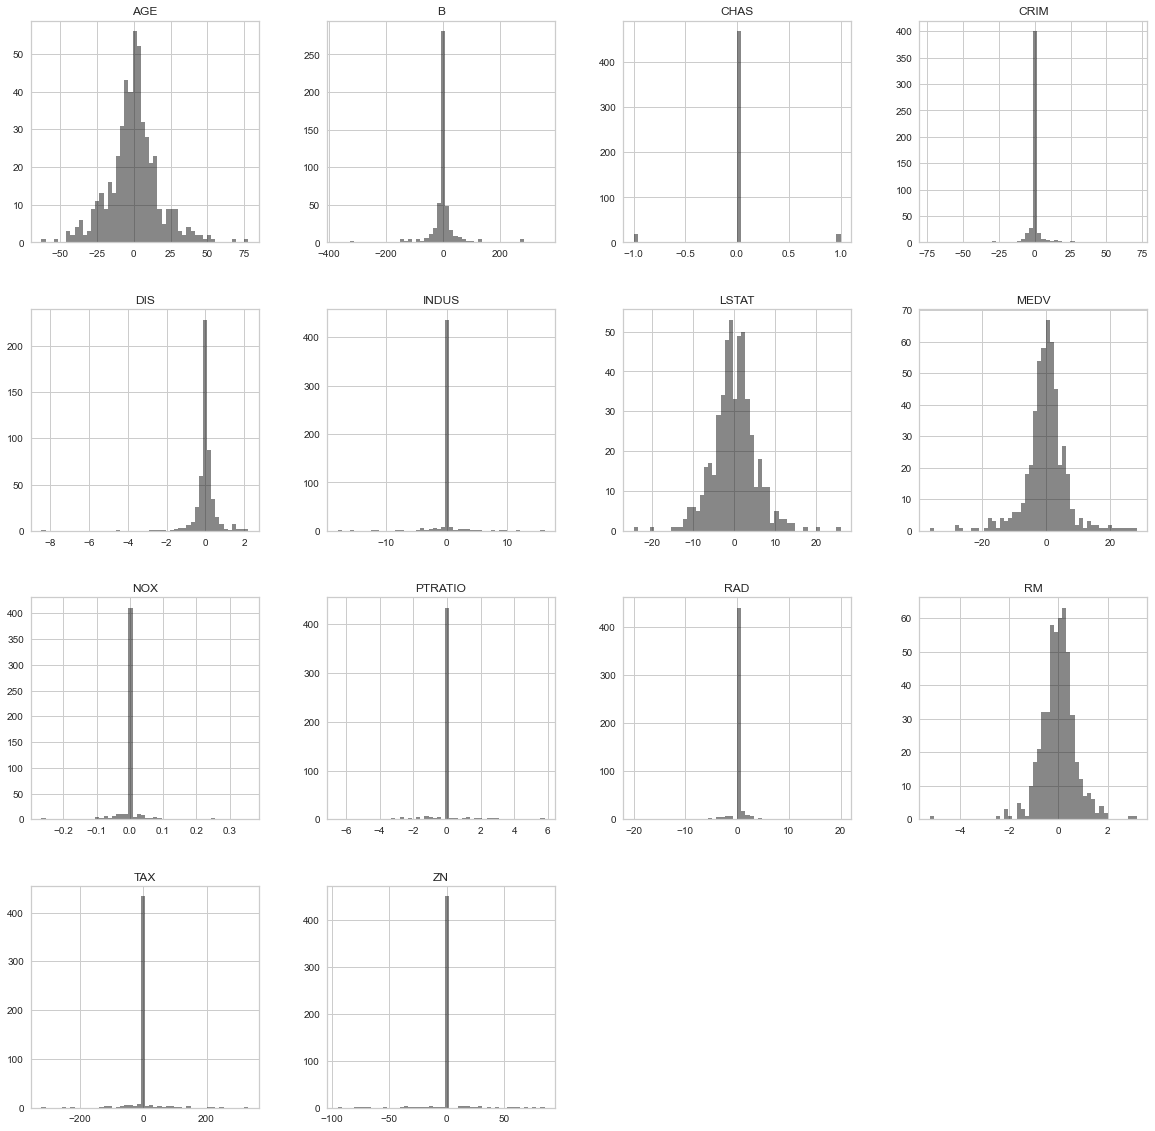

In [0]:
df.diff().hist(color='k', alpha=0.5, bins=50,figsize=(20,20));

### Boxplots

Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis .  
O boxplot tem uma reta (whisker ou fio de bigode) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior.  
Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais.  
O boxplot não é paramétrico, apresentando a variação em amostras de uma população estatística sem fazer qualquer suposição da distribuição estatística subjacente.  
Os espaços entre as diferentes partes da caixa indicam o grau de dispersão, a obliquidade nos dados e os outliers. 
O boxplot também permite estimar visualmente vários estimadores como amplitude interquartil, midhinge, range, mid-range, e trimean.  
Em resumo, o boxplot identifica onde estão localizados 50% dos valores mais prováveis, a mediana e os valores extremos.

![Boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Elements_of_a_boxplot_pt.svg/600px-Elements_of_a_boxplot_pt.svg.png)

![Boxplot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/330px-Boxplot_vs_PDF.svg.png)


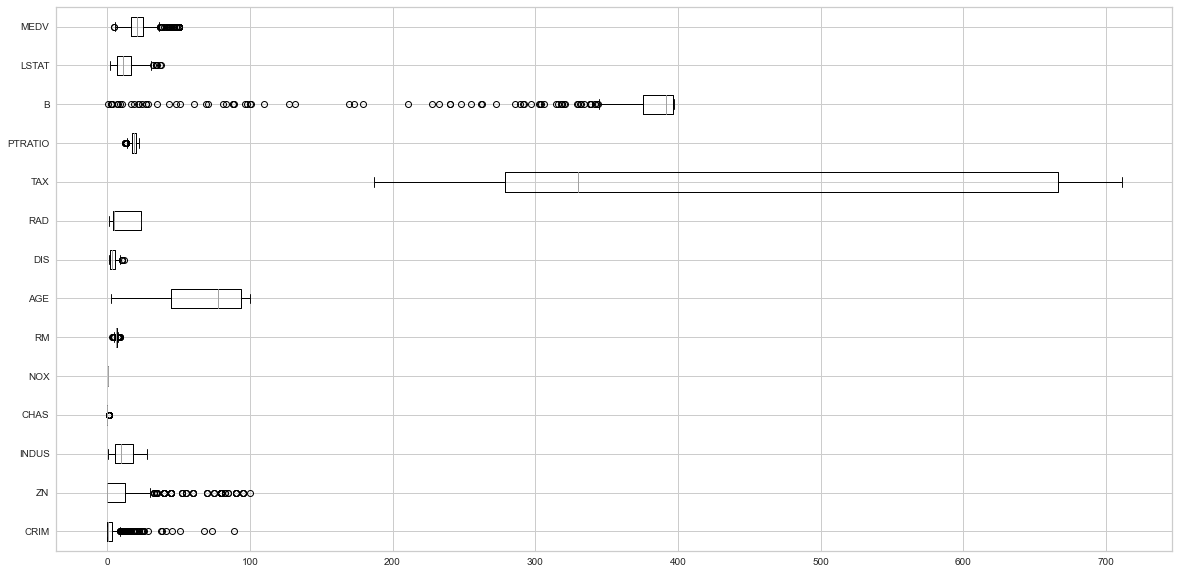

In [0]:
df.boxplot(figsize=(20,10),vert=False);

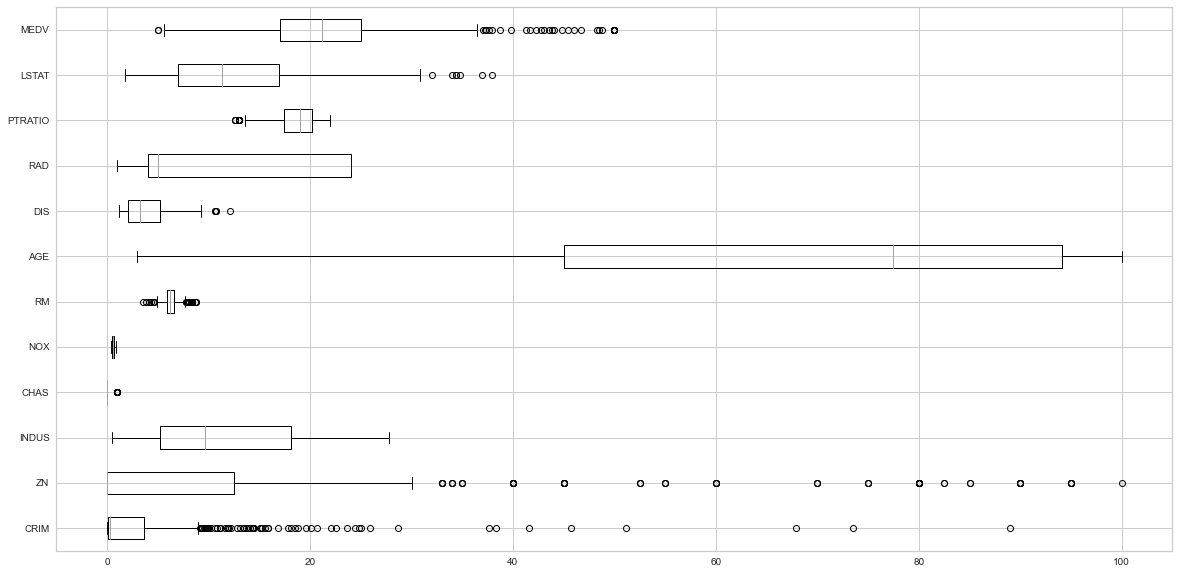

In [0]:
df.boxplot(figsize=(20,10),vert=False,column=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MEDV'])

## Diagramas de Dispersão

O diagrama de dispersão é conhecido como uma das principais ferramentas da qualidade que podem ser utilizadas por uma empresa.

Trata-se de uma representação gráfica que analisa a relação entre duas variáveis quantitativas — uma de causa e uma de efeito. Quando você tem uma hipótese do que causou algo, mas ainda deseja comprová-la por meio de uma análise mais aprofundada.

Esse tipo de diagrama traz números simultâneos das duas variáveis, deixando visível se o que acontece em uma variável causou interferência na outra. Ao estudar a correlação, você tem uma variável dependente Y (efeito), que se relaciona a variáveis independentes X (causas).

O modelo hipotético seria, portanto, y = f(x).

Mas, ainda sobre a definição do termo, você deve saber que essa correlação criada com base no diagrama pode ser:

**Positiva**: quando os pontos se unem em uma linha crescente. Isso quer dizer que, assim que uma variável aumenta, a outra também cresce;  
**Negativa**: quando os pontos se unem em uma linha decrescente. O que significa que, à medida que uma variável aumenta, a outra diminui;  
**Nula**: quando os pontos estão bem dispersos e, portanto, indica que não há correlação aparente entre as duas variáveis.  

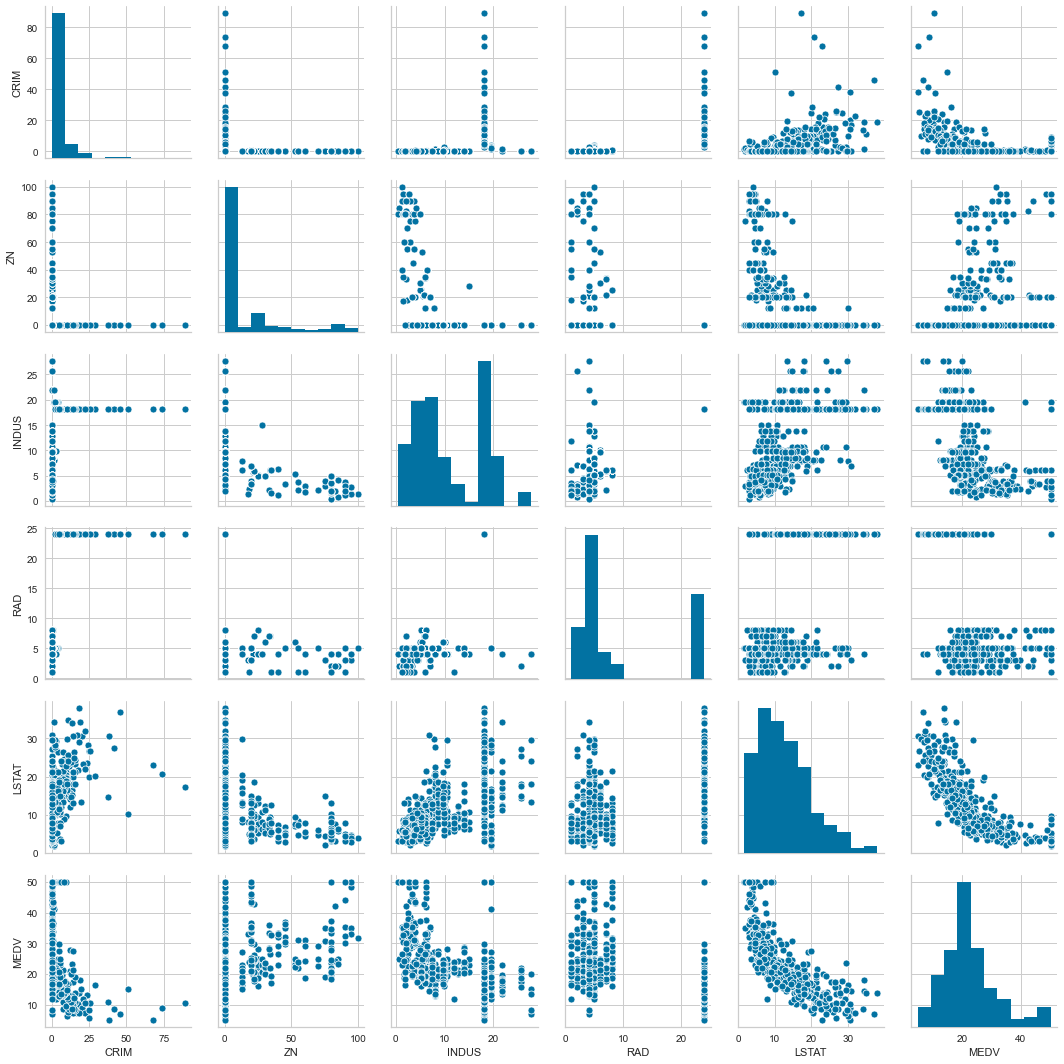

In [0]:
g = sns.pairplot(df, vars=['CRIM', 'ZN', 'INDUS', 'RAD', 'LSTAT','MEDV'])

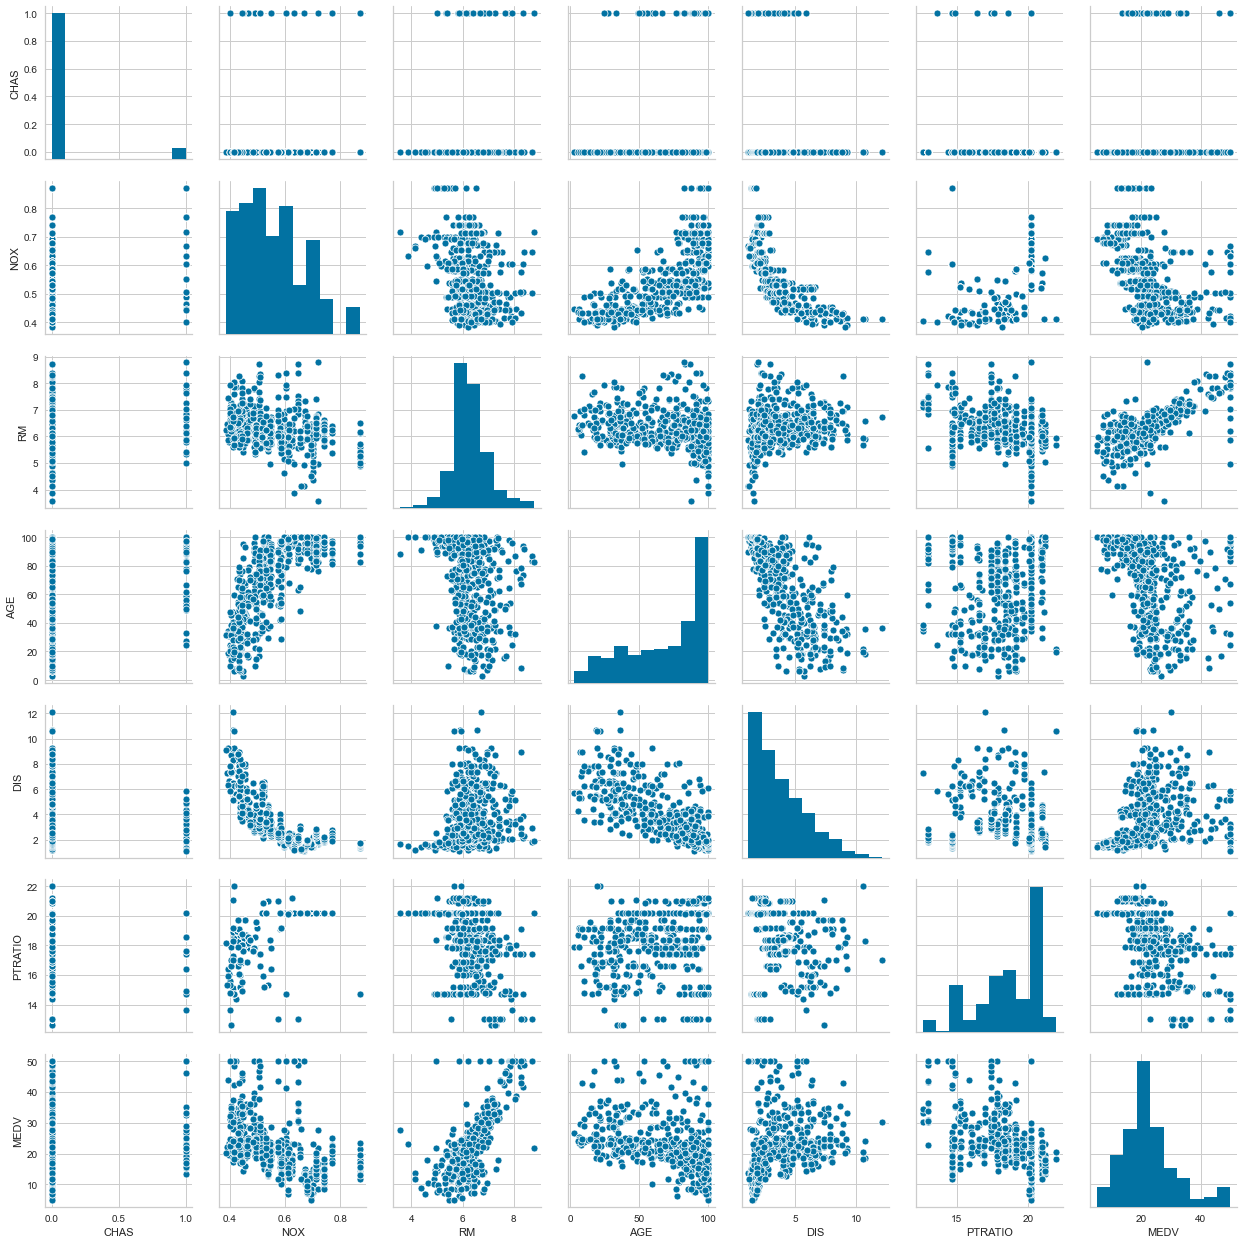

In [0]:
g = sns.pairplot(df, vars=['CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'MEDV'])

### Normalização dos dados

Para amenizar os efeitos causados por situações como essas, é necessário aplicar procedimentos de transformação de dados (também conhecidos como data transformation). 
Esses procedimentos abrangem a normalização de dados e a conversão de dados .
A técnica de normalização mais comum é a normalização min-max, que altera os valores extremos do conjunto de valores sob normalização e organiza os demais valores dentro do novo intervalo de domínio;.  
Outra técnica de normalização é a z-score, por meio da qual os valores são reorganizados pela média e desvio-padrão do conjunto de valores original.  
 #### Normalização min-max
A normalização min-max é uma das formas mais simples de normalização aplicada em problemas de mineração de dados. 

Quando aplicada a cada atributo de um conjunto de dados, permite que todos eles sejam organizados em uma mesma escala de valores. 

#### Normalização z-score

A normalização z-score também permite que os valores sejam padronizados. 
No entanto, isso ocorre com base na distribuição dos valores de cada atributo. 
Com esta normalização, cada valor do atributo é determinado pela posição que ocupa em relação aos demais, em uma distribuição simétrica.

**Fórmula da Normalização**

![Fórmula Normalização](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKHq9mM6db2qQQBEVNxh_K_XbjZAGqjrq-glbTpSjHUejVLHmC&usqp=CAU)

**Gráfico Normalizado**

![Gráfico Normalização](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQEYY4atF7SmY3O4E92cjU7suWYpAinqriP6yuR2pvdvJhd-JwN&usqp=CAU)

O padrão de normalização do sklearn é o z-score para empregá-lo basta aplicar a funçõa `StandardScaler().fit_transform(Dados as Normalizar)`.

In [0]:
from sklearn import (
    model_selection,
    preprocessing,
)
dfs = preprocessing.StandardScaler().fit_transform(df.values)

Vamos criar um dataframe com os dados normalizados

In [0]:
dfs = pd.DataFrame(dfs, columns=df.columns)

Vamos ver como ficma os histogramas

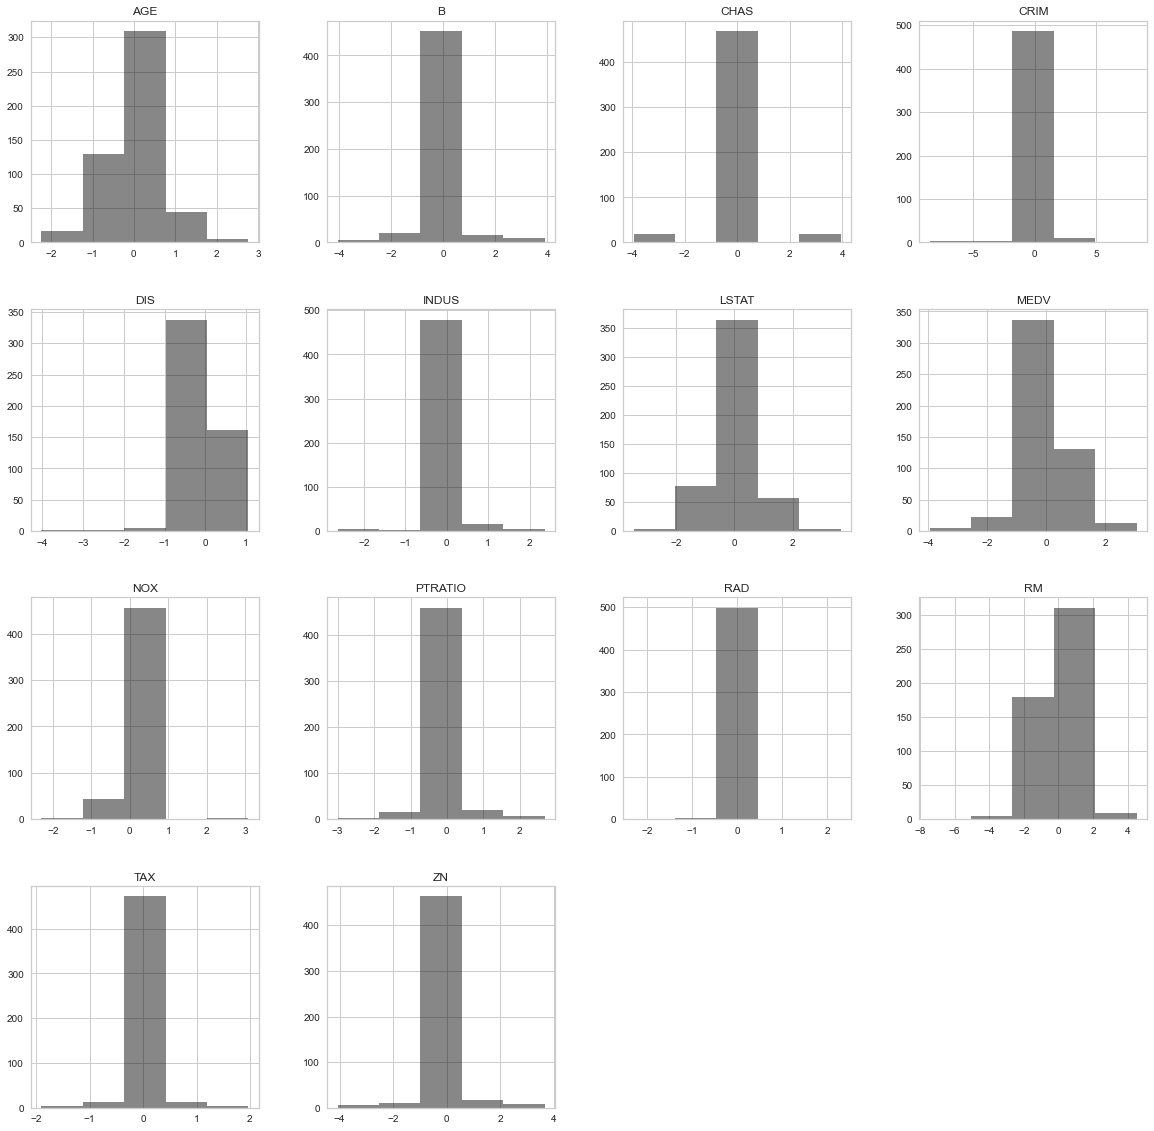

In [0]:
dfs.diff().hist(color='k', alpha=0.5, bins=5,figsize=(20,20));

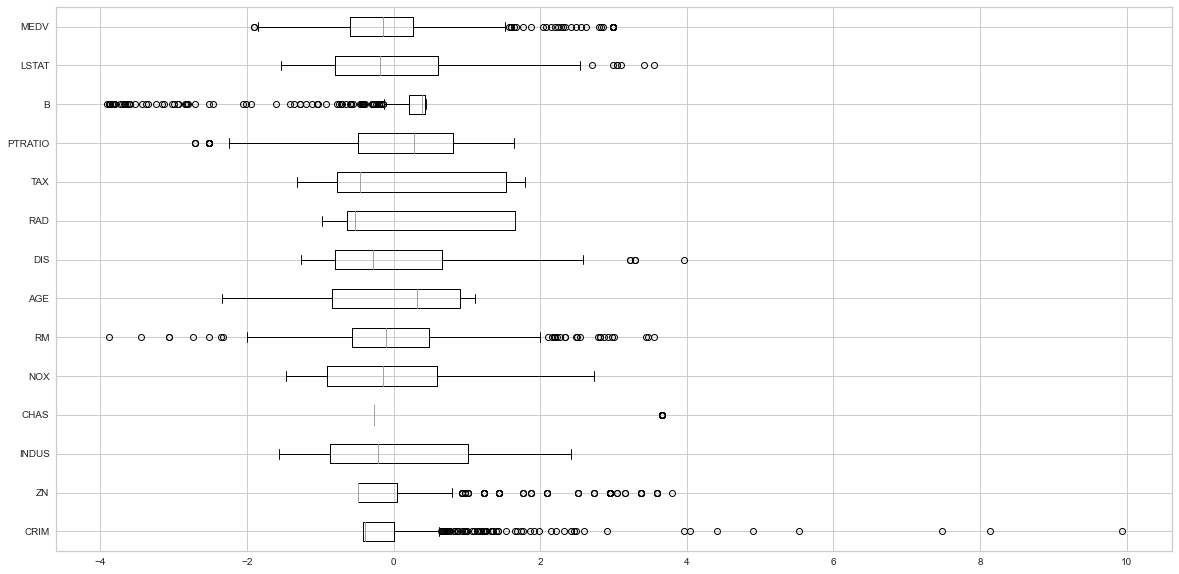

In [0]:
dfs.boxplot(figsize=(20,10),vert=False)

### Criação dos conjuntos d eTreinamento e Teste

Vamos agora criar nosso conjunto de treinamento e teste

![Estrutura de Treinamento e teste](https://miro.medium.com/max/1400/1*rBx2D83rNUloJsq5gC_QIw.png)

Para fazer a separação dodas vamos usar uma estrutura similar a esta: 

`from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)`

In [0]:

from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

### Treinamento

O treinamento de um modelo de aprendizado supervisionado padrão assume a forma de uma importação, a criação de uma instância e o ajuste do modelo.

![Fluxo de Treinamento](https://miro.medium.com/max/1400/1*nI6GdRcSol5js_IC5wTtbQ.png)



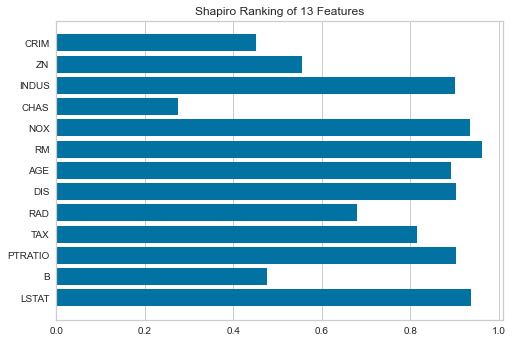

In [0]:
from yellowbrick.features import Rank1D

# Criação da Intância Rank 1D
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(bos_X, bos_y)   # Ajuste dos dados ao visualizer
visualizer.transform(bos_X)    # Transformação dos dados
visualizer.show()              # Renderização da figura

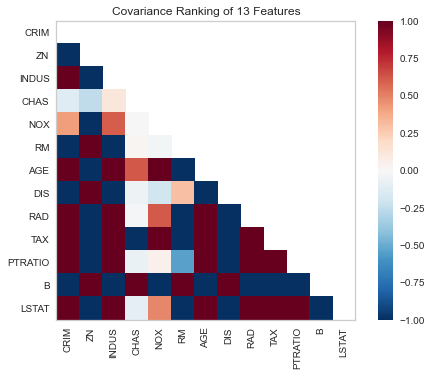

In [0]:
from yellowbrick.features import Rank2D


# Criação da Intância Rank 2D
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(bos_X, bos_y)  # Ajuste dos dados ao visualizer
visualizer.transform(bos_X)   # Transformação dos dados
visualizer.show()             # Renderização da figura

### Modelos de Regressão

Os modelos de regressor do sklearn estão listados abaixo, com o ramo destacado em azul e o nome do modelo em laranja.

![Famílias de Modelos](https://miro.medium.com/max/2000/1*Ue8DVc9CcHrIqn9dhko0Tg.png)

### Teste

A avaliação do desempenho do modelo é feita com dados de teste de neste formato:  

![Fluxo de Teste](https://miro.medium.com/max/1400/1*mHoJvaA0SNzz_QM6Xi9ADQ.png)

## Regressão Linear

O que é regressão linear?
É um método para prever uma variável de destino ajustando a melhor relação linear entre a variável dependente e independente.

![Regressão Lienar](https://miro.medium.com/max/1400/1*9ugqVJMy3Ah-Go_WPOm3LQ.png)


### 1. Regressão Linear Simples
Este método usa uma única variável independente para prever uma variável dependente, ajustando um melhor relacionamento linear.

![Regressão Lienar Simples](https://miro.medium.com/max/1400/1*csk8XTXy0j__hm_kbkwxCw.jpeg)

### 2. Regressão Linear Multipla
Este método usa mais de uma variável independente para prever uma variável dependente, ajustando um melhor relacionamento linear.
No caso de regressão múltipla, os parâmetros podem ser encontrados da mesma maneira que no caso de regressão simples

![Regressão Lienar Multipla](https://miro.medium.com/max/1400/1*DaFQEFYBNVCoVMNEB9KOGg.jpeg)

In [0]:
## Importação das bibliotecas
from sklearn.linear_model import (
    LinearRegression,
)
## Criação da Instância
lr = LinearRegression()
## Treinamento dos Modelos
lr.fit(bos_X_train, bos_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
## Calculo dos Scores
print(lr.score(bos_X_test, bos_y_test))
## Coeficientes Ajustados
print(lr.coef_)

0.7112260057484908
[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


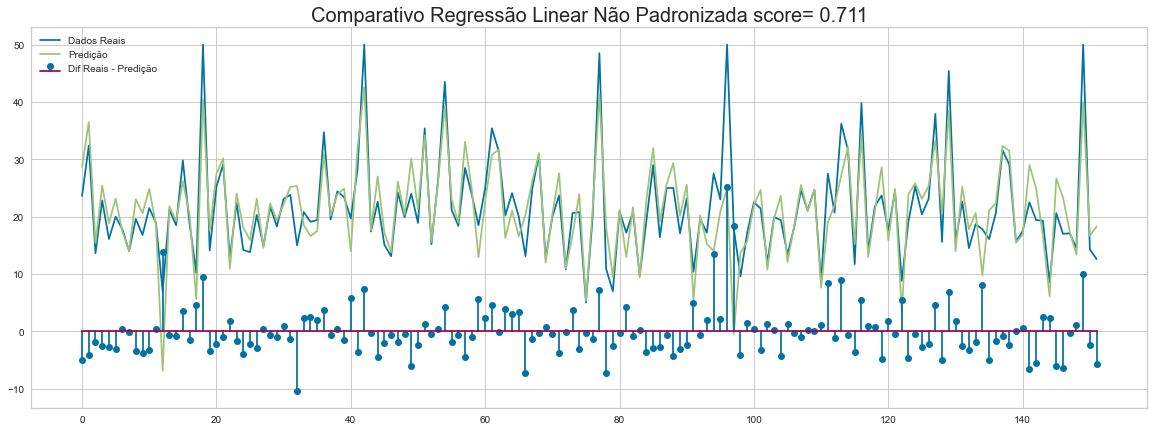

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_y_test, label='Dados Reais')
plt.plot(lr.predict(bos_X_test), label='Predição')
plt.stem(bos_sy_test-lr.predict(bos_X_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão Linear Não Padronizada score= '+ str(np.round(lr.score(bos_X_test, bos_y_test),3)),fontsize=20)
plt.legend()

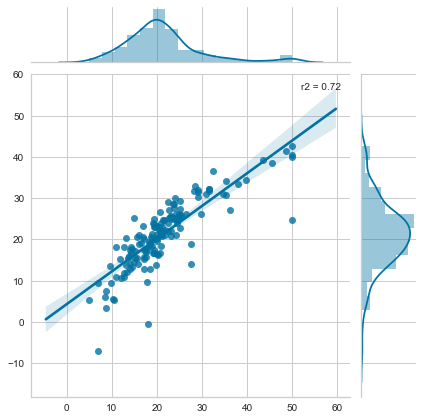

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_y_test,lr.predict(bos_X_test), kind="reg", stat_func=r2)

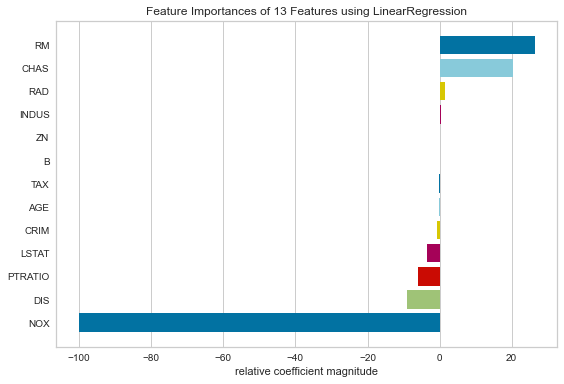

In [0]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(lr, labels=bos_X.columns)
viz.fit(bos_X, bos_y)
viz.show()

## Regressão Linear com dados Padronizados

In [0]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lr2.score(bos_sX_test, bos_sy_test))
print(lr2.intercept_)
print(lr2.coef_)

0.7112260057484923
22.50945471291039
[-1.14691411  0.83432605  0.33940694  0.79163612 -1.784727    2.84783949
 -0.30429306 -2.91562521  2.11140045 -1.46519951 -1.9696347   1.07567771
 -3.90310727]


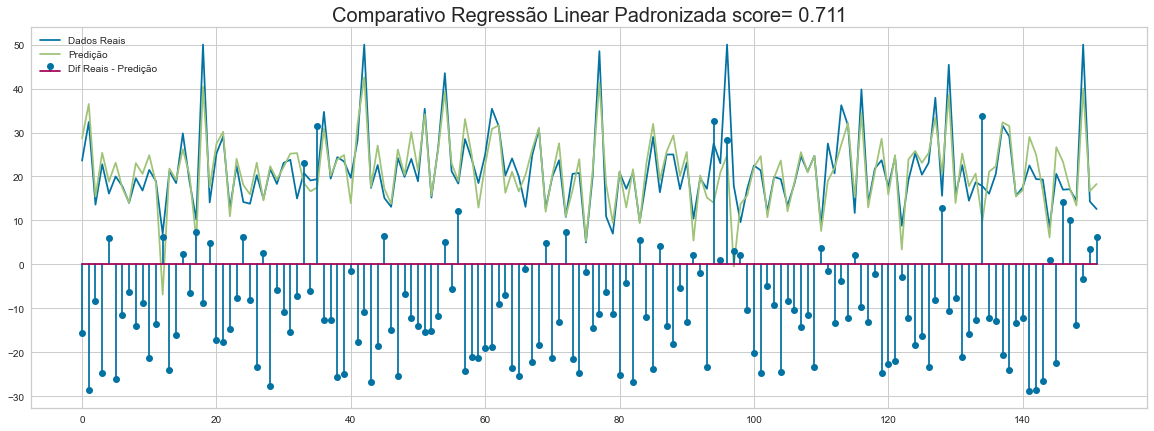

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_sy_test, label='Dados Reais')
plt.plot(lr2.predict(bos_sX_test), label='Predição')
plt.stem(bos_sy_test-lr.predict(bos_sX_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão Linear Padronizada score= '+ str(np.round(lr2.score(bos_sX_test, bos_sy_test),3)), fontsize=20)
plt.legend()

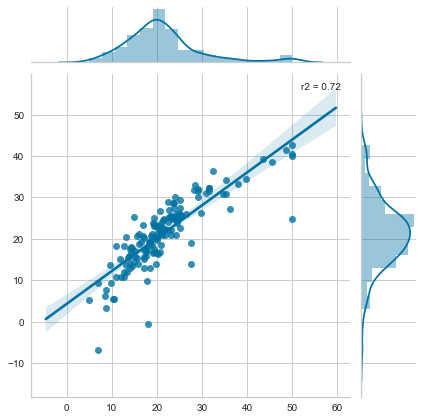

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_sy_test,lr2.predict(bos_sX_test), kind="reg", stat_func=r2)

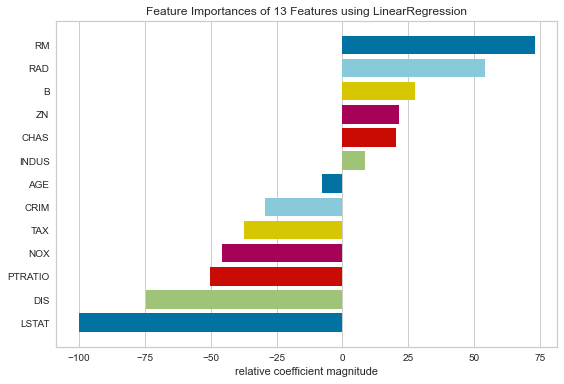

In [0]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(lr2, labels=bos_X.columns)
viz.fit(bos_sX, bos_y)
viz.show()

## Regressão com Máquinas de Vetores ded Suporte

As SVMs (upport Vector Machines) são bem conhecidas em problemas de classificação. O uso de SVMs em regressão não é tão bem documentado, no entanto. Esses tipos de modelos são conhecidos como SVR (Support Vector Regression).
Neste artigo, abordarei a utilidade do SVR em comparação com outros modelos de regressão, aprofundarei a matemática por trás do algoritmo e fornecerei um exemplo usando o conjunto de dados Boston Housing Price. Digite Regressão de vetores de suporte. O SVR nos dá a flexibilidade de definir quanto erro é aceitável em nosso modelo e encontrará uma linha apropriada (ou hiperplano em dimensões mais altas) para ajustar os dados.
Em contraste com o OLS, a função objetivo do SVR é minimizar os coeficientes - mais especificamente, a norma l2 do vetor de coeficiente - não o erro ao quadrado. Em vez disso, o termo erro é tratado nas restrições, nas quais definimos o erro absoluto menor ou igual a uma margem especificada, chamada erro máximo, ϵ (epsilon).

![Regressão Lienar Multipla](https://miro.medium.com/max/1400/1*nrXHNqC_hqpyux7GUbtqAQ.png)

In [0]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487937

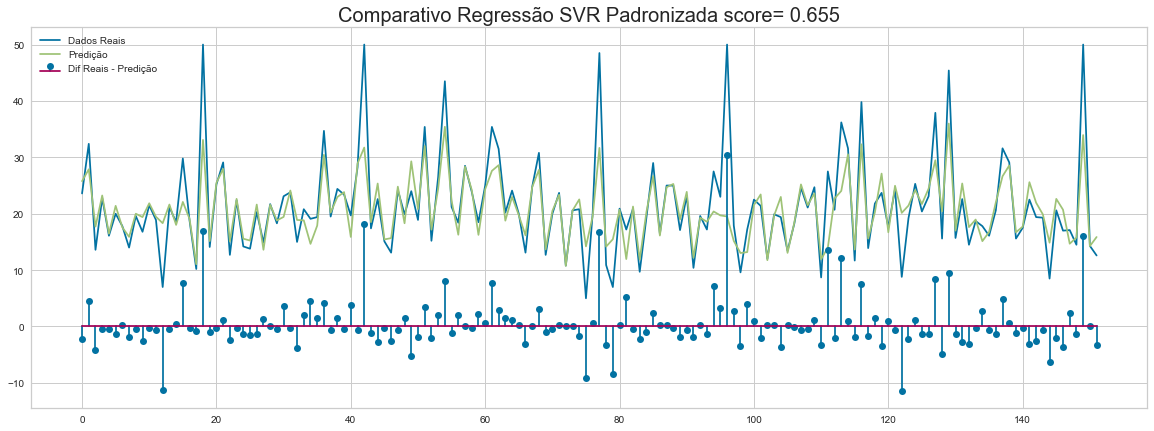

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_sy_test, label='Dados Reais')
plt.plot(svr.predict(bos_sX_test), label='Predição')
plt.stem(bos_sy_test-svr.predict(bos_sX_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão SVR Padronizada score= '+ str(np.round(svr.score(bos_sX_test, bos_sy_test),3)), fontsize=20)
plt.legend()

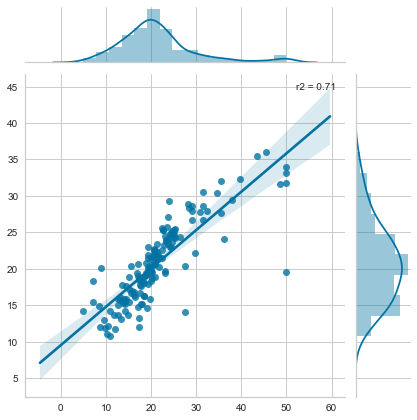

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_sy_test,svr.predict(bos_sX_test), kind="reg", stat_func=r2)

## Regressão K Nearest Neighbors (K vizinhos mais próximos)

K vizinhos mais próximos é um algoritmo simples que armazena todos os casos disponíveis e prevê o alvo numérico com base em uma medida de similaridade (por exemplo, funções de distância). O KNN foi usado na estimativa estatística e no reconhecimento de padrões já no início dos anos 70 como uma técnica não paramétrica.
 
**Algoritmo**
Uma implementação simples da regressão KNN é calcular a média do alvo numérico dos K vizinhos mais próximos. Outra abordagem utiliza uma média ponderada à distância inversa dos K vizinhos mais próximos. A regressão KNN usa as mesmas funções de distância que a classificação KNN.
![KNN](https://www.saedsayad.com/images/KNN_similarity.png)

### Lembrando o algoritmo KNN para classificação

![KNN](https://miro.medium.com/max/1200/1*dbwgKi7A8oHC1i-Su355eg.gif)

In [0]:
from sklearn.neighbors import (
    KNeighborsRegressor,
)
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592417

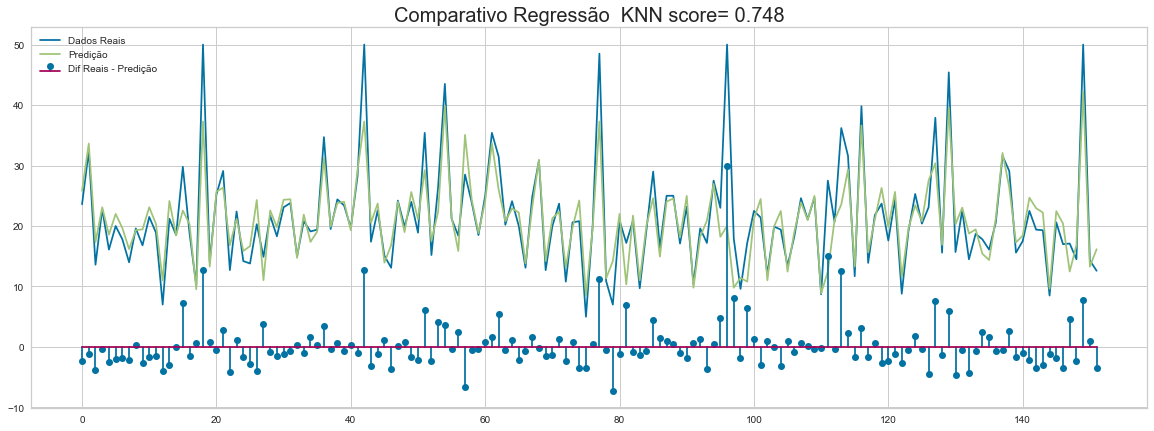

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_sy_test, label='Dados Reais')
plt.plot(knr.predict(bos_sX_test), label='Predição')
plt.stem(bos_sy_test-knr.predict(bos_sX_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão  KNN score= '+ str(np.round(knr.score(bos_sX_test, bos_sy_test),3)), fontsize=20)
plt.legend()

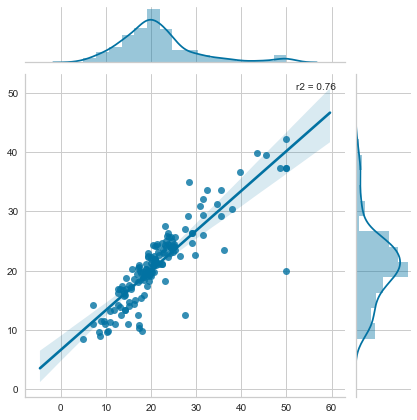

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_sy_test,knr.predict(bos_sX_test), kind="reg", stat_func=r2)

## Regressão Arvores de Decisão
As árvores de decisão (TD) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que prediz o valor de uma variável de destino, aprendendo regras simples de decisão inferidas a partir dos recursos de dados.

Por exemplo, no exemplo abaixo, as árvores de decisão aprendem com os dados a aproximação de uma curva senoidal com um conjunto de regras de decisão if-then-else. Quanto mais profunda a árvore, mais complexas são as regras de decisão e mais adequado o modelo.

![KNN](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_0011.png)


**Algumas vantagens das árvores de decisão são:**

- Simples de entender e interpretar. Árvores podem ser visualizadas.

- Requer pouca preparação de dados. Outras técnicas geralmente requerem normalização de dados, variáveis ​​fictícias precisam ser criadas e valores em branco removidos. Observe, no entanto, que este módulo não suporta valores ausentes.

- O custo do uso da árvore (isto é, previsão de dados) é logarítmico no número de pontos de dados usados ​​para treinar a árvore.

- Capaz de lidar com dados numéricos e categóricos. Outras técnicas são geralmente especializadas na análise de conjuntos de dados que possuem apenas um tipo de variável. Veja algoritmos para mais informações.

- Capaz de lidar com problemas de várias saídas.

- Apresenta bom desempenho, mesmo que suas suposições sejam um pouco violadas pelo modelo real a partir do qual os dados foram gerados.

**As desvantagens das árvores de decisão incluem:**

- O aprendizado árvore de decisão permite criar árvores super complexas que não generalizam bem os dados. Isso é chamado de sobreajuste (_overfitting_). Mecanismos como poda, definição do número mínimo de amostras necessárias em um nó da folha ou definição da profundidade máxima da árvore são necessários para evitar esse problema.

- As árvores de decisão podem ser instáveis ​​porque pequenas variações nos dados podem resultar na geração de uma árvore completamente diferente. Esse problema é atenuado usando árvores de decisão dentro de um conjunto.

- Existem conceitos difíceis de aprender porque as árvores de decisão não os expressam facilmente, como problemas de XOR, paridade ou multiplexador.

- Os aprendizado da árvore de decisão criam árvores tendenciosas se algumas classes dominam. Portanto, é recomendável equilibrar o conjunto de dados antes de se ajustar à árvore de decisão.

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
dtr.score(bos_X_test, bos_y_test)

0.8559207694719114

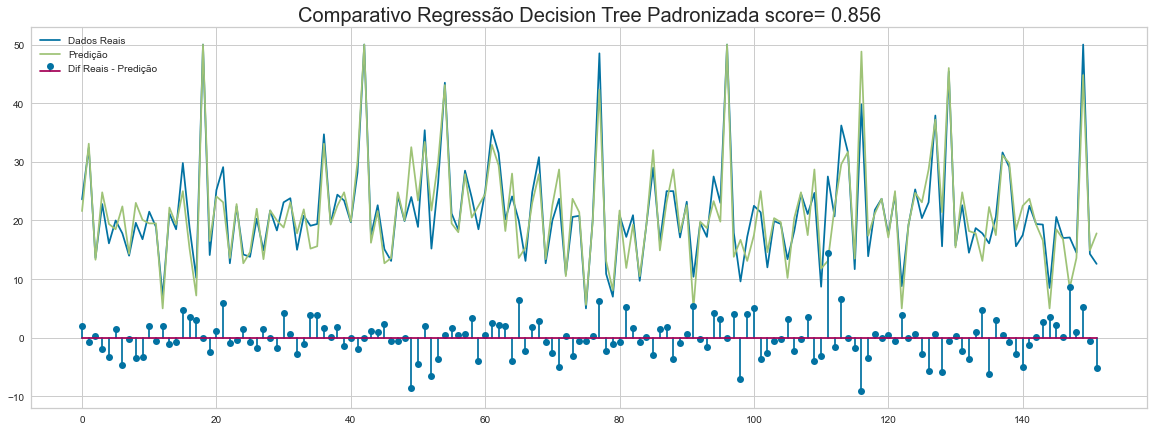

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_y_test, label='Dados Reais')
plt.plot(dtr.predict(bos_X_test), label='Predição')
plt.stem(bos_y_test-dtr.predict(bos_X_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão Decision Tree Padronizada score= '+ str(np.round(dtr.score(bos_X_test, bos_y_test),3)), fontsize=20)
plt.legend()

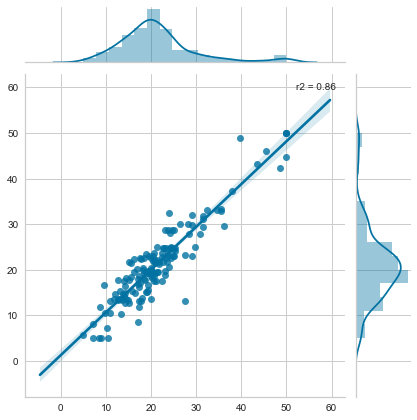

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_y_test,dtr.predict(bos_X_test), kind="reg", stat_func=r2)

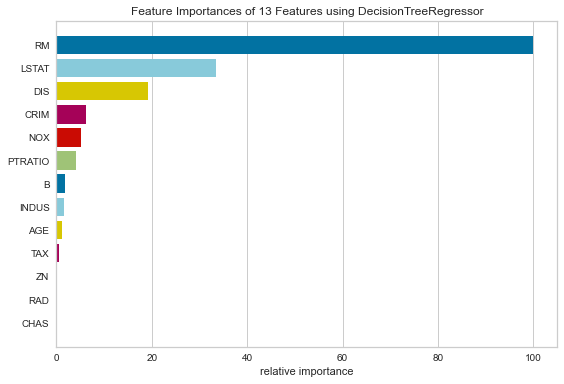

In [0]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(dtr, labels=bos_X.columns)
viz.fit(bos_X, bos_y)
viz.show()

## Regressão com Florestas Randomicas (Random Forrests)

Floresta Aleatória (Random Forest) é um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros. É também um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão. Neste post, você vai aprender como o Floresta Aleatória funciona e outras coisas importantes sobre ele.

Floresta Aleatória (random forest) é um algoritmo de aprendizagem supervisionada. Como você pode perceber pelo seu nome, ele cria uma floresta de um modo aleatório. A “floresta” que ele cria é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumenta o resultado geral.  

Dizendo de modo simples: o algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.  

Uma grande vantagem do algoritmo de florestas aleatórias é que ele pode ser utilizado tanto para tarefas de classificação quanto para regressão, o que representa a maioria dos sistemas de aprendizagem de máquina atuais. Eu irei discutir florestas aleatórias em classificação já que esta tarefa é considerada um dos pilares da aprendizagem de máquina. Abaixo, você pode ver uma floresta aleatória com duas árvores:

![RF](https://miro.medium.com/max/1400/0*tG-IWcxL1jg7RkT0.png)

In [0]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8721182042634867

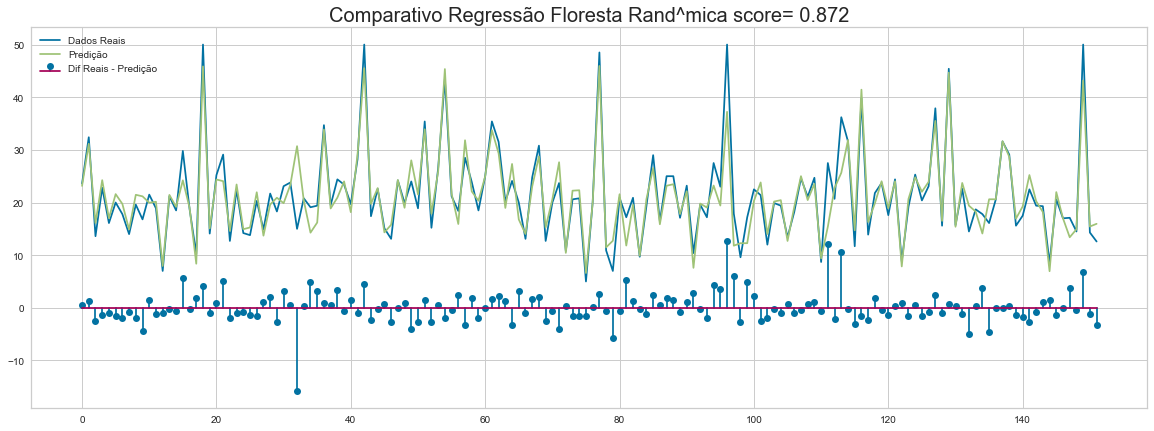

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_y_test, label='Dados Reais')
plt.plot(rfr.predict(bos_X_test), label='Predição')
plt.stem(bos_y_test-rfr.predict(bos_X_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão Floresta Rand^mica score= '+ str(np.round(rfr.score(bos_X_test, bos_y_test),3)), fontsize=20)
plt.legend()

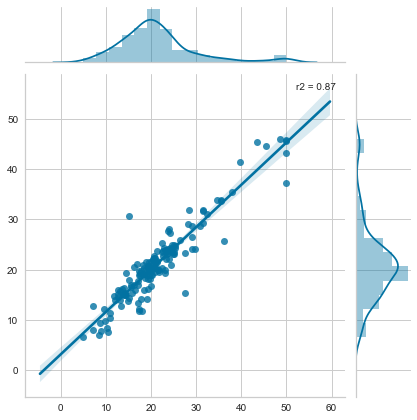

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_y_test,rfr.predict(bos_X_test), kind="reg", stat_func=r2)

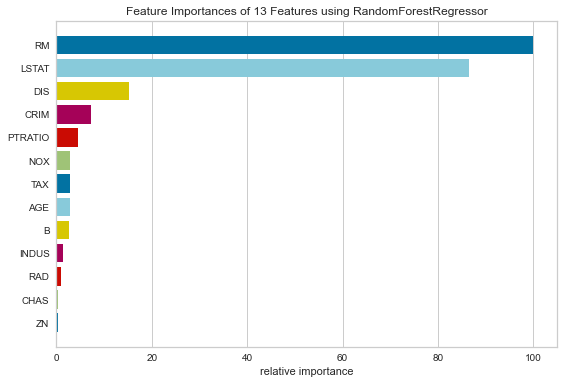

In [0]:
from yellowbrick.model_selection import FeatureImportances


viz = FeatureImportances(rfr, labels=bos_X.columns)
viz.fit(bos_X, bos_y)
viz.show()

## Regressão com Gradient Boosting (XGBoost)

Chegamos enfim ao boosting. Esta é uma técnica desenvolvida recentemente que se mostrou muito poderosa e hoje corresponde a uma das mais utilizadas em competições de machine learning. O princípio que está por trás de qualquer algoritmo de boosting é a combinação do resultado de muitos classificadores (ou regressores) fracos, se combinando para formar uma espécie de comitê forte de decisão. Embora não haja restrições quanto a estes classificadores e regressores, é usual a utilização de árvores.

Em sua definição matemática, boosting é uma forma de expansão, ajustando os dados em uma soma ponderada de funções elementares.

Note na figura como o ajuste fica progressivamente mais preciso com a adição de novas árvores. Mas quantas árvores podemos adicionar antes que haja overfitting? É claro que a resposta depende de muitos fatores, onde não menos importantes são os dados disponíveis para análise. 

![GB](https://www.datalabserasaexperian.com.br/wp-content/uploads/2018/11/gradient_boosting_by_hand-768x737.png)

Algoritmos de boosting têm sido cada vez mais utilizados na comunidade de machine learning, especialmente após a enorme sequência de sucessos obtidos por algumas implementações em competições por todo o mundo. Estes modelos tipicamente produzem resultados muito acima dos obtidos com técnicas tradicionais, e portanto fazem parte do arsenal de todos os data scientists da equipe – de fácil implementação, geram rapidamente um benchmark inicial realista em um número grande de aplicações.

In [0]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)
xgr.score(bos_X_test, bos_y_test)
#xgr.predict(bos_X.iloc[[0]])

[17:16:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.871679473122472

Text(0.5, 1.0, 'Comparativo Regressão XGBoost score= 0.872')

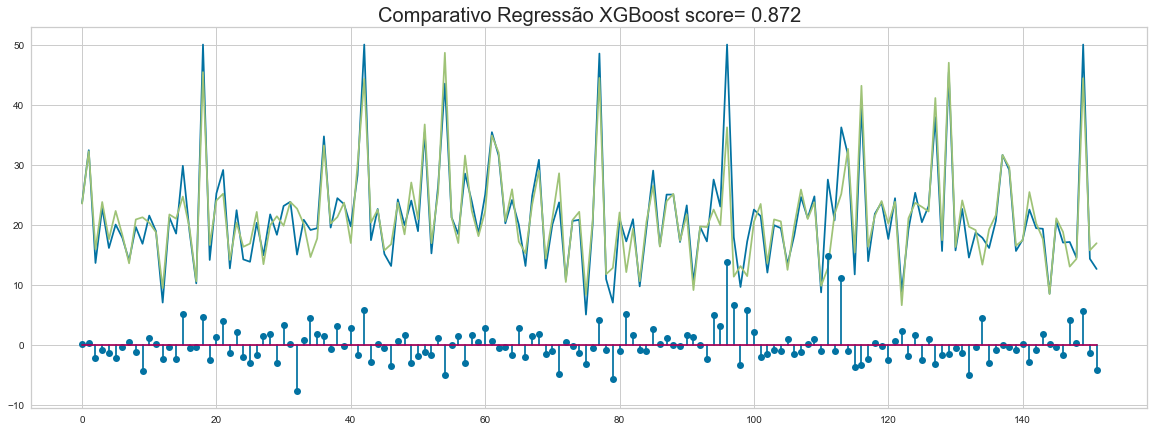

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_y_test, label='Dados Reais')
plt.plot(xgr.predict(bos_X_test), label='Predição')
plt.stem(bos_y_test-xgr.predict(bos_X_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão XGBoost score= '+ str(np.round(xgr.score(bos_X_test, bos_y_test),3)), fontsize=20)

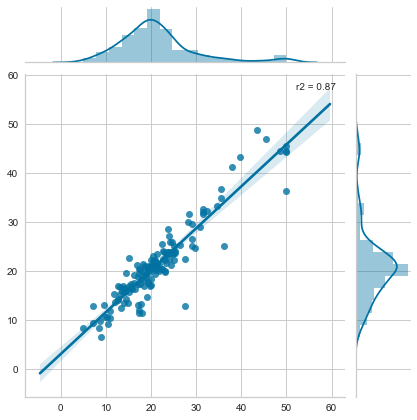

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_y_test,xgr.predict(bos_X_test), kind="reg", stat_func=r2)

In [0]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.485
RM             0.263
PTRATIO        0.060
NOX            0.051
DIS            0.032


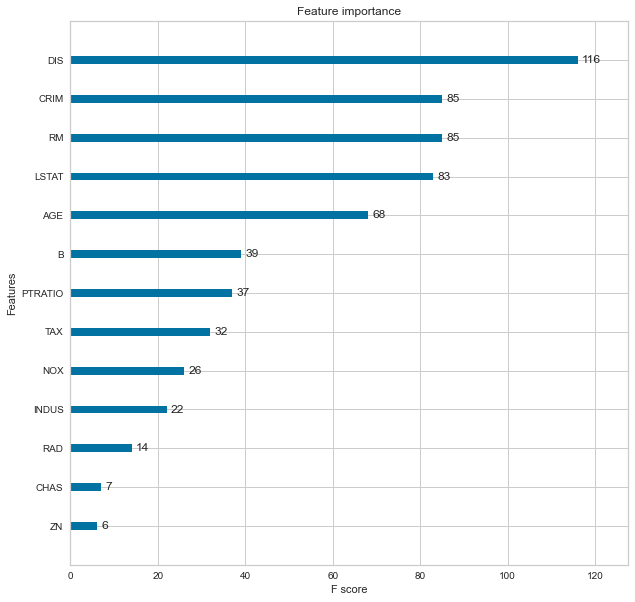

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(xgr, ax=ax)
#fig.savefig("images/mlpr_1405.png", dpi=300)

## Regressão com CatBoost

CatBoost
O CatBoost é um algoritmo de gradient boosting em árvore de decisão. Ele apresentou o segundo melhor desempenho na amostra com um bom tempo de treinamento e teste.
Como esse algoritmo não está implementado no Hyperopt-sklearn foram utilizados os parâmetros descritos nesse post para a definição do espaço de busca dos parâmetros.

O CatBoost é baseado no aumento de gradiente. Uma nova técnica de aprendizado de máquina desenvolvida pela Yandex que supera muitos algoritmos de impulso existentes, como XGBoost, Light GBM.
Embora os algoritmos de aprendizado profundo exijam muitos dados e poder computacional, ainda são necessários algoritmos de impulso para a maioria dos problemas de negócios. No entanto, algoritmos de aprimoramento como o XGBoost levam horas para treinar e, às vezes, você fica frustrado ao ajustar os hiper-parâmetros.


Por outro lado, o CatBoost é fácil de implementar e muito poderoso. Ele fornece excelentes resultados, pois é o primeiro a ser executado. Então, vamos descobrir o que há de tão especial no CatBoost.

Estrutura da árvore base:
Uma diferença principal entre o CatBoost e outros algoritmos de reforço é que o CatBoost implementa árvores simétricas. Isso ajuda a diminuir o tempo de previsão, o que é extremamente importante para ambientes de baixa latência.

![CB](https://miro.medium.com/max/1004/1*HbFjRMOJbTSPCSvOL8A3Fg.png)

O CatBoost é muito rápido e supera todos os algoritmos de aumento de gradiente. É uma boa opção para treinar se a maioria dos recursos do seu conjunto de dados for categórica. Você pode praticar ainda mais o CatBoost nas tarefas fornecidas pela equipe do CatBoost aqui. Um modelo que é robusto demais e com ferramentas muito poderosas, o que mais você está esperando? Comece a trabalhar no CatBoost !!!

Algoritmos de boosting têm sido cada vez mais utilizados na comunidade de machine learning, especialmente após a enorme sequência de sucessos obtidos por algumas implementações em competições por todo o mundo. Estes modelos tipicamente produzem resultados muito acima dos obtidos com técnicas tradicionais, e portanto fazem parte do arsenal de todos os data scientists da equipe – de fácil implementação, geram rapidamente um benchmark inicial realista em um número grande de aplicações.

In [0]:
import catboost as ctb
from catboost import Pool
cbr = ctb.CatBoostRegressor()
cbr.fit(bos_X_train, bos_y_train, verbose=False)
print(cbr.score(bos_X_test, bos_y_test))


0.8771523489718589


Text(0.5, 1.0, 'Comparativo Regressão CatBoost Padronizada score= 0.877')

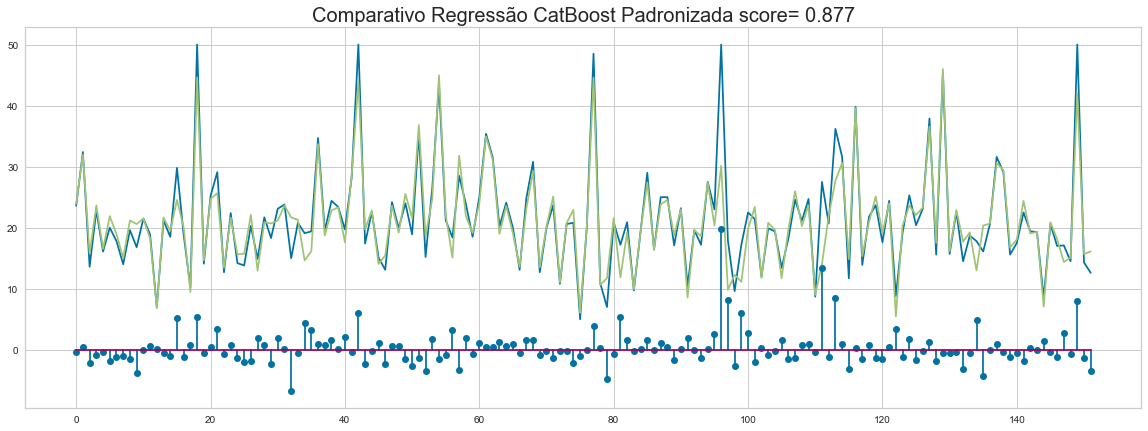

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bos_y_test, label='Dados Reais')
plt.plot(cbr.predict(bos_X_test), label='Predição')
plt.stem(bos_y_test-cbr.predict(bos_X_test), label = 'Dif Reais - Predição')
plt.title('Comparativo Regressão CatBoost Padronizada score= '+ str(np.round(cbr.score(bos_X_test, bos_y_test),3)), fontsize=20)

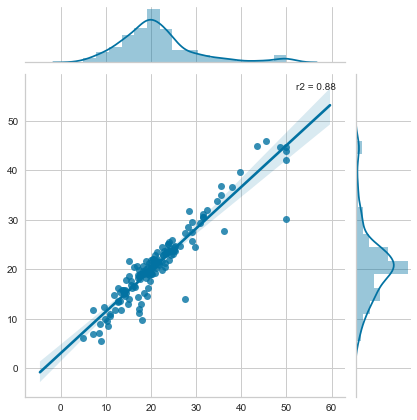

In [0]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(bos_y_test,cbr.predict(bos_X_test), kind="reg", stat_func=r2)

### Comparação dos Modelos

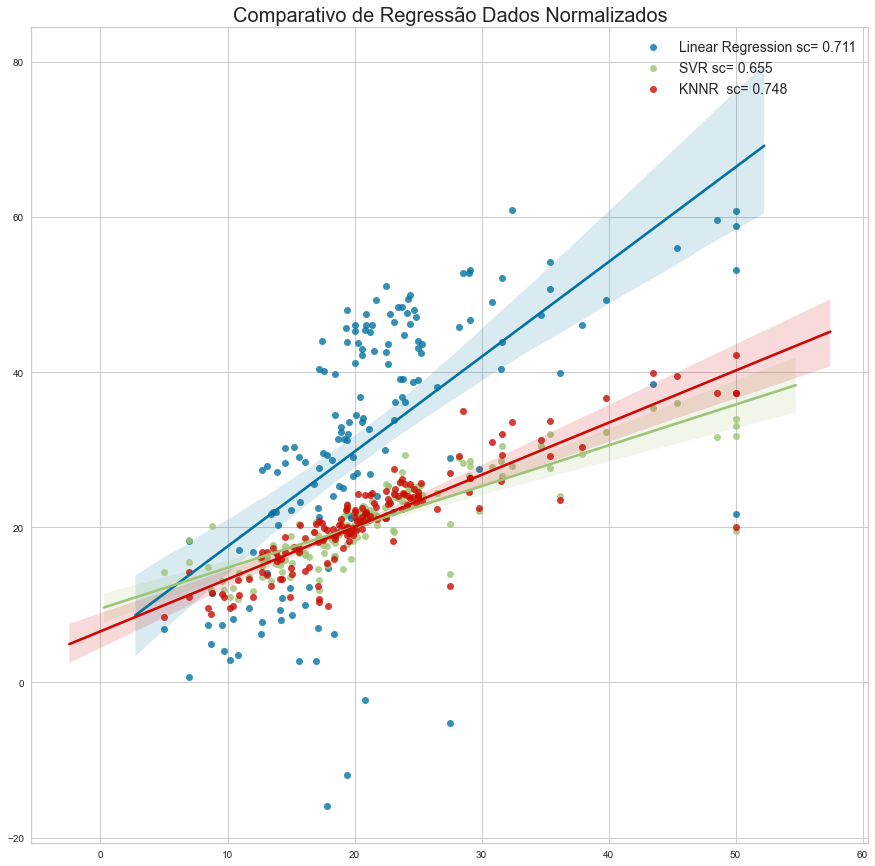

In [0]:
plt.figure(figsize=(15,15))

sns.regplot(bos_sy_test,lr.predict(bos_sX_test), label=('Linear Regression sc= '+ str(np.round(lr.score(bos_X_test, bos_y_test),3))))
sns.regplot(bos_sy_test,svr.predict(bos_sX_test), label= ('SVR sc= '+ str(np.round(svr.score(bos_sX_test, bos_sy_test),3))))
sns.regplot(bos_sy_test,knr.predict(bos_sX_test), label= ('KNNR  sc= '+ str(np.round(knr.score(bos_sX_test, bos_sy_test),3))))
#sns.regplot(bos_y_test,rfr.predict(bos_X_test), label = 'Random Forrest')
#sns.regplot(bos_y_test,dtr.predict(bos_X_test), label = 'Decision Tree')
#sns.regplot(bos_y_test,cbr.predict(bos_X_test), label = 'catboost')
#sns.regplot(bos_y_test,xgr.predict(bos_X_test), label = 'XGBoost')
plt.title('Comparativo de Regressão Dados Normalizados', fontsize=20)
plt.legend(fontsize=14)

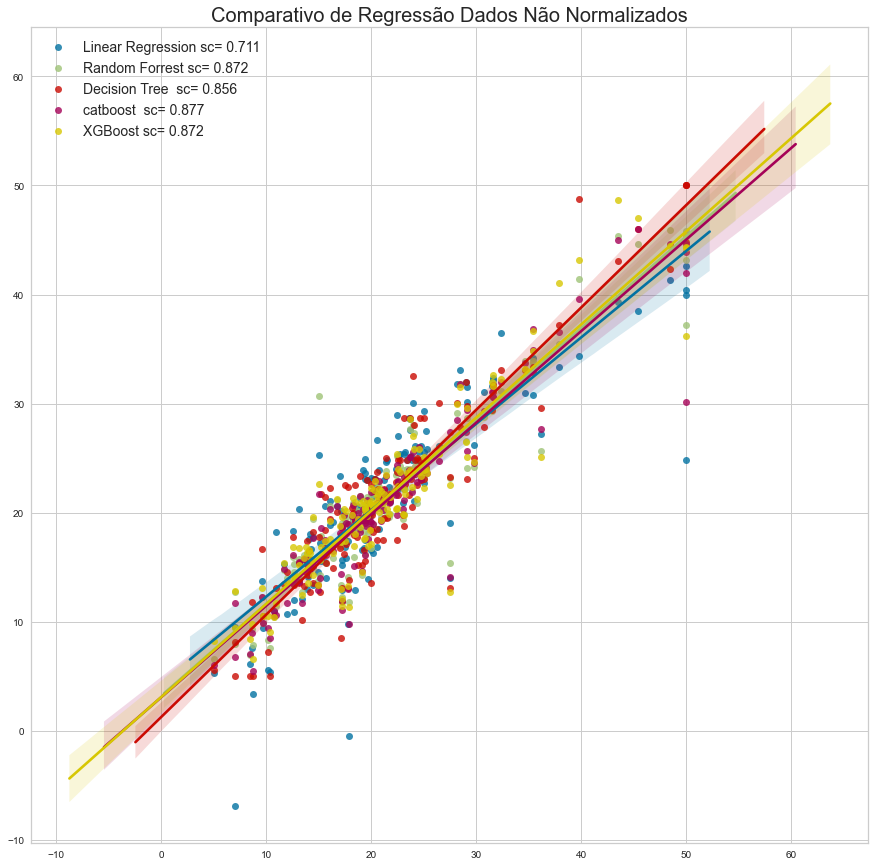

In [0]:
plt.figure(figsize=(15,15))
sns.regplot(bos_y_test,lr.predict(bos_X_test), label=('Linear Regression sc= '+ str(np.round(lr.score(bos_X_test, bos_y_test),3))))
sns.regplot(bos_y_test,rfr.predict(bos_X_test), label = ('Random Forrest sc= '+ str(np.round(rfr.score(bos_X_test, bos_y_test),3))))
sns.regplot(bos_y_test,dtr.predict(bos_X_test), label = ('Decision Tree  sc= '+ str(np.round(dtr.score(bos_X_test, bos_y_test),3))))
sns.regplot(bos_y_test,cbr.predict(bos_X_test), label = ('catboost  sc= '+ str(np.round(cbr.score(bos_X_test, bos_y_test),3))))
sns.regplot(bos_y_test,xgr.predict(bos_X_test), label = ('XGBoost sc= '+ str(np.round(xgr.score(bos_X_test, bos_y_test),3))))
plt.title('Comparativo de Regressão Dados Não Normalizados', fontsize=20)
plt.legend(fontsize=14)